Wicaksa Munajat
CST383 Summer 2022
June 13, 2022

In [1]:
import numpy as np
import pandas as pd
from matplotlib import rcParams
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
import seaborn as sns
import graphviz 

In [2]:
# switch to seaborn default stylistic parameters
sns.set()
# larger plot fonts
sns.set_context('talk')
# change default plot size
rcParams['figure.figsize'] = 10,8

In [3]:
# read the cpu data
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2)    # clock speed in MHz

In [4]:
# get ready for Scikit-Learn
predictors = ['mmin', 'chmax']      # choose predictors as you like
target = 'prp'
X = df[predictors].values
y = df[target].values

In [5]:
# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [6]:
# train the model
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

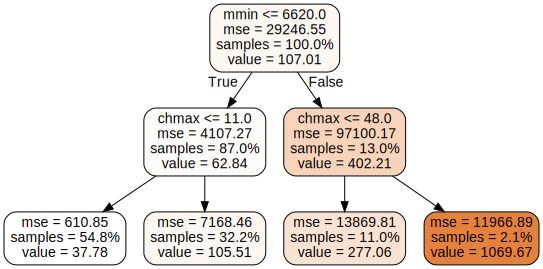

In [7]:
# view the tree
# conda install python-graphviz
dot_data = export_graphviz(reg, precision=2,
                     feature_names=predictors,  
                     proportion=True,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
graph

In [8]:
# make predictions and compute error
y_predict = reg.predict(X_test)
errors = y_test - y_predict
rmse = np.sqrt((errors**2).mean())
print('rmse: {:0.2f}'.format(rmse))

rmse: 88.42


In [9]:
df.head()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp,cs
adviser 32/60,125,256,6000,256,16,128,198,199,8.00
amdahl 470v/7,29,8000,32000,32,8,32,269,253,34.48
amdahl 470v/7a,29,8000,32000,32,8,32,220,253,34.48
amdahl 470v/7b,29,8000,32000,32,8,32,172,253,34.48
amdahl 470v/7c,29,8000,16000,32,8,16,132,132,34.48


In [11]:
# get ready for Scikit-Learn
predictors = ['cach', 'myct']      # choose predictors as you like
target = 'prp'
X = df[predictors].values
y = df[target].values


In [12]:
# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [13]:
# train the model
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2)

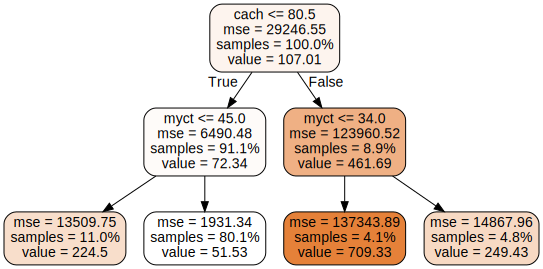

In [14]:
# view the tree
# conda install python-graphviz
dot_data = export_graphviz(reg, precision=2,
                     feature_names=predictors,  
                     proportion=True,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
graph


In [15]:
# make predictions and compute error
y_predict = reg.predict(X_test)
errors = y_test - y_predict
rmse = np.sqrt((errors**2).mean())
print('rmse: {:0.2f}'.format(rmse))


rmse: 91.34
